In [60]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
train = pd.read_csv("train.csv",parse_dates = True, low_memory = False, index_col = 'Date')
test = pd.read_csv("test.csv",parse_dates = True, low_memory = False, index_col = 'Date')
store = pd.read_csv("store.csv", low_memory = False)

In [3]:
print("train dim:",train.shape)
print("test dim:",test.shape)
print("store dim:",store.shape)

train dim: (1017209, 8)
test dim: (41088, 7)
store dim: (1115, 10)


In [4]:
train.columns


Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [5]:
train.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1


In [6]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [7]:
test.head(3)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0


In [8]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [102]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Month'] = train.Month.map("{:02}".format)
train['Day'] = train.Day.map("{:02}".format)
train['WeekOfYear'] = train.WeekOfYear.map("{:02}".format)
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear
test['WeekOfYear'] = test.index.weekofyear
test['Month'] = test.Month.map("{:02}".format)
test['Day'] = test.Day.map("{:02}".format)
test['WeekOfYear'] = test.WeekOfYear.map("{:02}".format)

In [103]:
train.reset_index().agg(['min','max'])

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
min,2013-01-01,1,1,0,0,0,0,0,0,2013,01,01,01
max,2015-07-31,1115,7,41551,7388,1,1,c,1,2015,12,31,52


In [11]:
test.reset_index().agg(['min','max'])

,Date,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
min,2015-08-01,1,1,1,0.0,0,0,0,2015,8,1,31
max,2015-09-17,41088,1115,7,1.0,1,a,1,2015,9,31,38


In [12]:
train.apply(lambda x: x.nunique())

Store             1115
DayOfWeek            7
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
Year                 3
Month               12
Day                 31
WeekOfYear          52
dtype: int64

In [13]:
test.apply(lambda x: x.nunique())

Id               41088
Store              856
DayOfWeek            7
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
Year                 1
Month                2
Day                 31
WeekOfYear           8
dtype: int64

In [14]:
store.apply(lambda x: x.nunique())

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [15]:
store.apply(lambda x: x.isna().sum()) #Missing Value Count

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
train.apply(lambda x: x.isna().sum()) #Missing Value Count

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOfYear       0
dtype: int64

In [17]:
test.apply(lambda x: x.isna().sum()) #Missing Value Count

Id                0
Store             0
DayOfWeek         0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
Year              0
Month             0
Day               0
WeekOfYear        0
dtype: int64

In [104]:
train_overall_sales = pd.DataFrame(train[['Year','Month','Sales']].groupby(['Year','Month']).sum()).reset_index()
train_overall_sales['YearMonth']=train_overall_sales.Year.astype(str) +"-"+ train_overall_sales.Month.astype(str)
train_overall_sales.to_csv("train_overall_sales.csv")

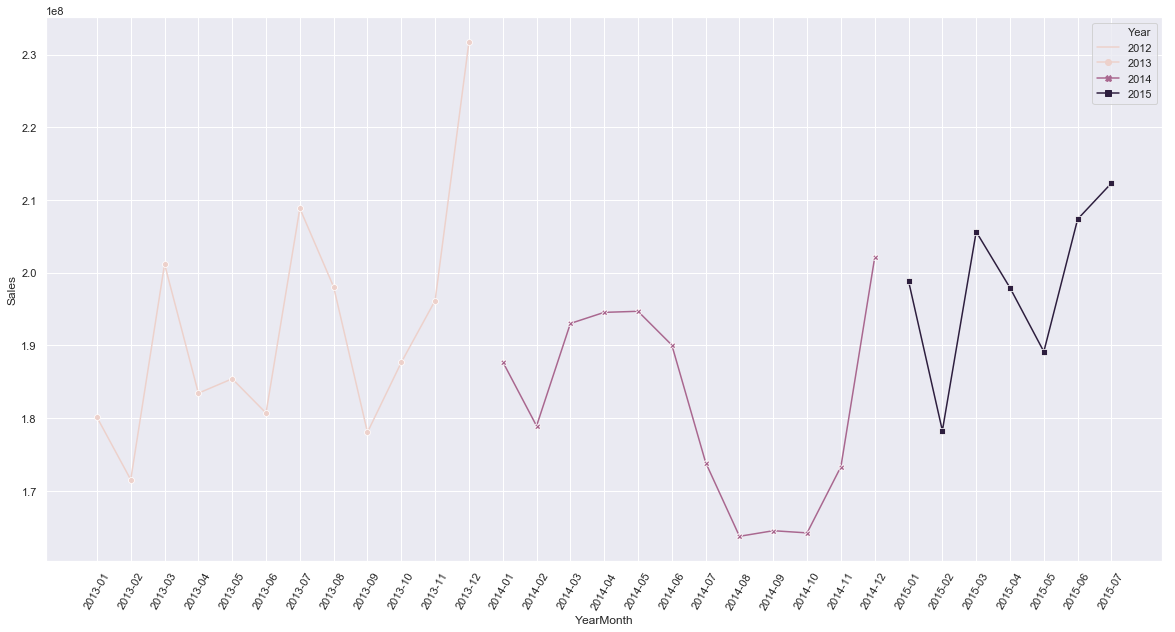

In [111]:
g= sns.lineplot(x="YearMonth",y="Sales",style="Year",hue="Year",
                markers=True, dashes=False,legend='brief' ,data=train_overall_sales)
for item in g.get_xticklabels():
    item.set_rotation(60)

In [112]:
pd.DataFrame(train[['Month','Sales']].groupby(['Month']).median()).sort_values('Sales', ascending=False).to_csv("average_monthly_sales.csv")
pd.DataFrame(train[['Year','Sales']].groupby(['Year']).median()).sort_values('Sales', ascending=False).to_csv("average_yearly_sales.csv")
pd.DataFrame(train[['WeekOfYear','Sales']].groupby(['WeekOfYear']).median()).sort_values('Sales', ascending=False).to_csv("average_weekly_sales.csv")
